<a href="https://colab.research.google.com/github/Jorgecardetegit/BioNex/blob/main/Mask_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mask creation**

In this notebook we will be applying a mask to a cell in order to segment the leukocytes from the rest of the cells.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

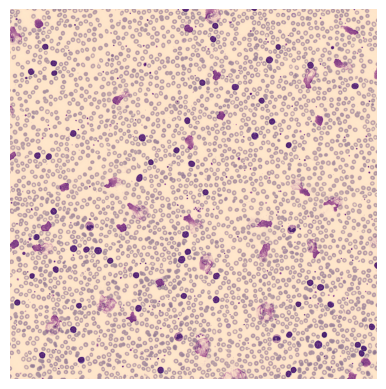

In [ ]:
# Load the image
image_path =  '/content/1008323_001 (1).jpg'
image = plt.imread(image_path)

# Display the result
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# 1. Creating the mask

In [ ]:
from skimage import io
from skimage.color import rgb2hsv
image = io.imread('/content/1008323_001 (1).jpg')

# Convert the RGB image to HSV
hsv_image = rgb2hsv(image)

# Define the range for purple color
purple_min = np.array([0.7, 0.2, 0.2])  # Minimum HSV values for purple
purple_max = np.array([0.9, 1.0, 1.0])  # Maximum HSV values for purple
purple_mask = ((hsv_image[:,:,0] >= purple_min[0]) & (hsv_image[:,:,0] <= purple_max[0]) &
               (hsv_image[:,:,1] >= purple_min[1]) & (hsv_image[:,:,1] <= purple_max[1]) &
               (hsv_image[:,:,2] >= purple_min[2]) & (hsv_image[:,:,2] <= purple_max[2]))
purple_cells = np.zeros_like(image)
purple_cells[purple_mask] = image[purple_mask]

# Display the result
plt.imshow(purple_cells)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


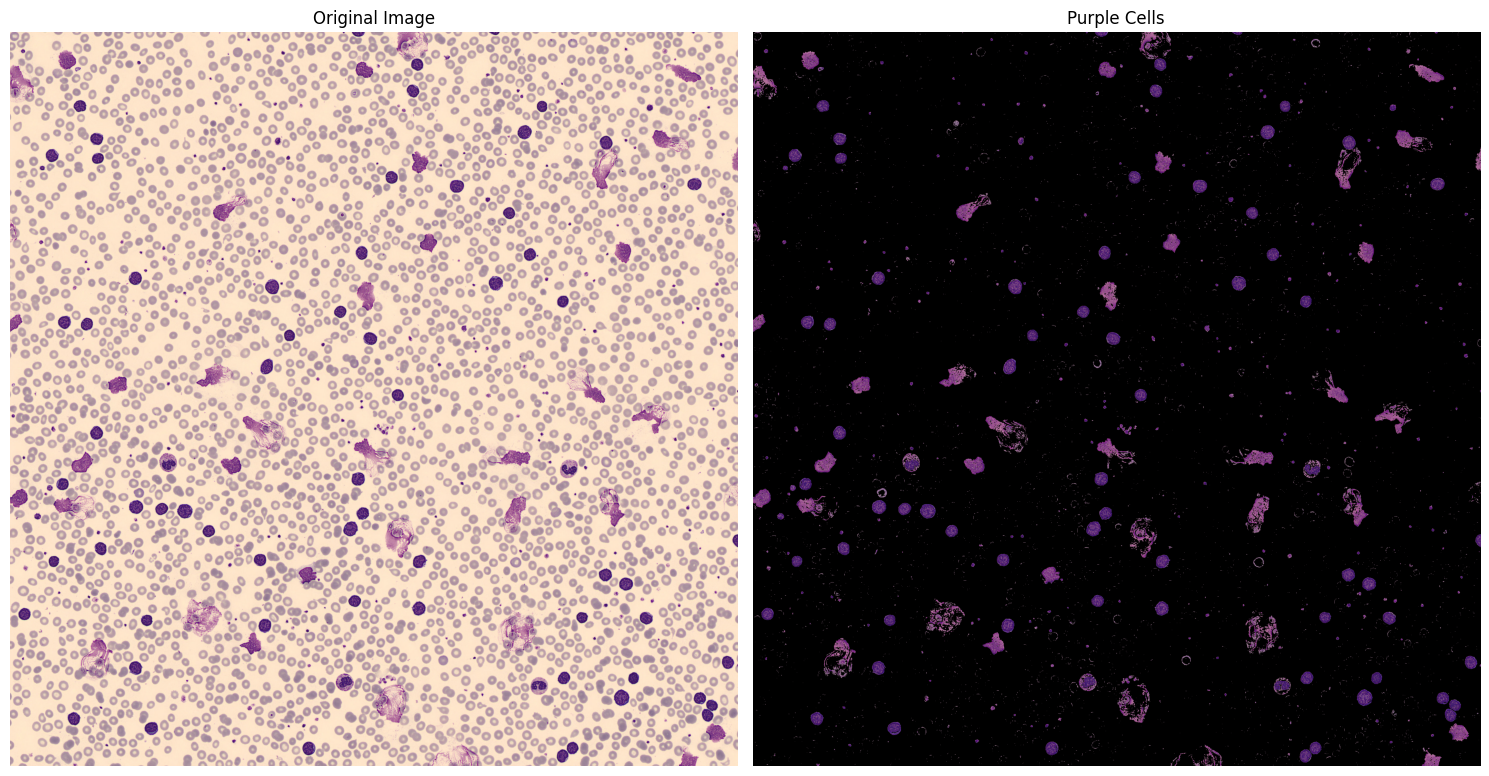

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')  # Turn off axis numbers and ticks

# Display the image with purple cells only
ax[1].imshow(purple_cells)
ax[1].set_title('Purple Cells')
ax[1].axis('off')  # Turn off axis numbers and ticks

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

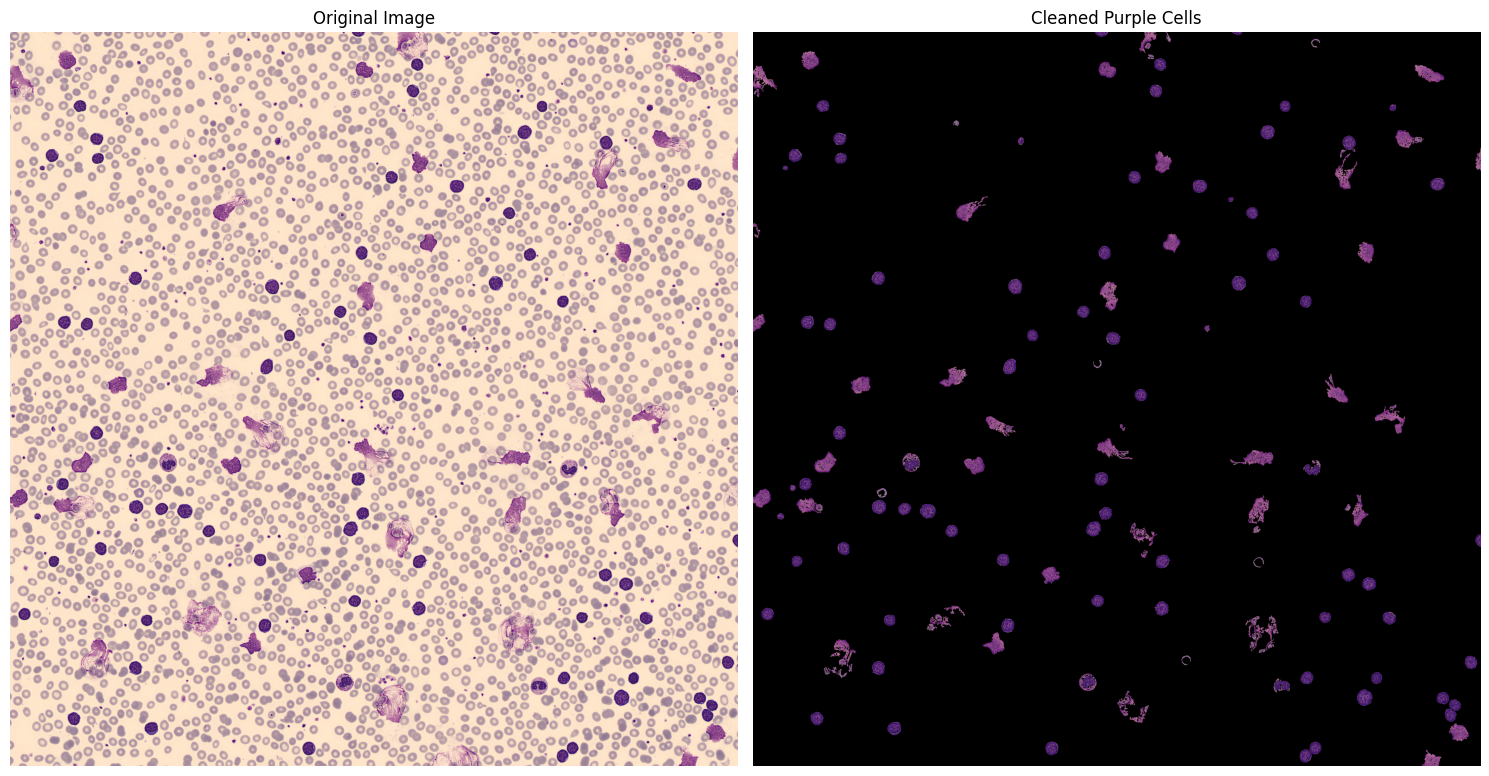

In [ ]:
from skimage import morphology

# Remove small objects from the binary mask
cleaned_mask = morphology.remove_small_objects(purple_mask, min_size=250)

# Apply the cleaned mask to the original image to get the purple cells without small points
cleaned_purple_cells = np.zeros_like(image)
cleaned_purple_cells[cleaned_mask] = image[cleaned_mask]

# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')  # Turn off axis numbers and ticks

# Display the image with cleaned purple cells only
ax[1].imshow(cleaned_purple_cells)
ax[1].set_title('Cleaned Purple Cells')
ax[1].axis('off')  # Turn off axis numbers and ticks

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

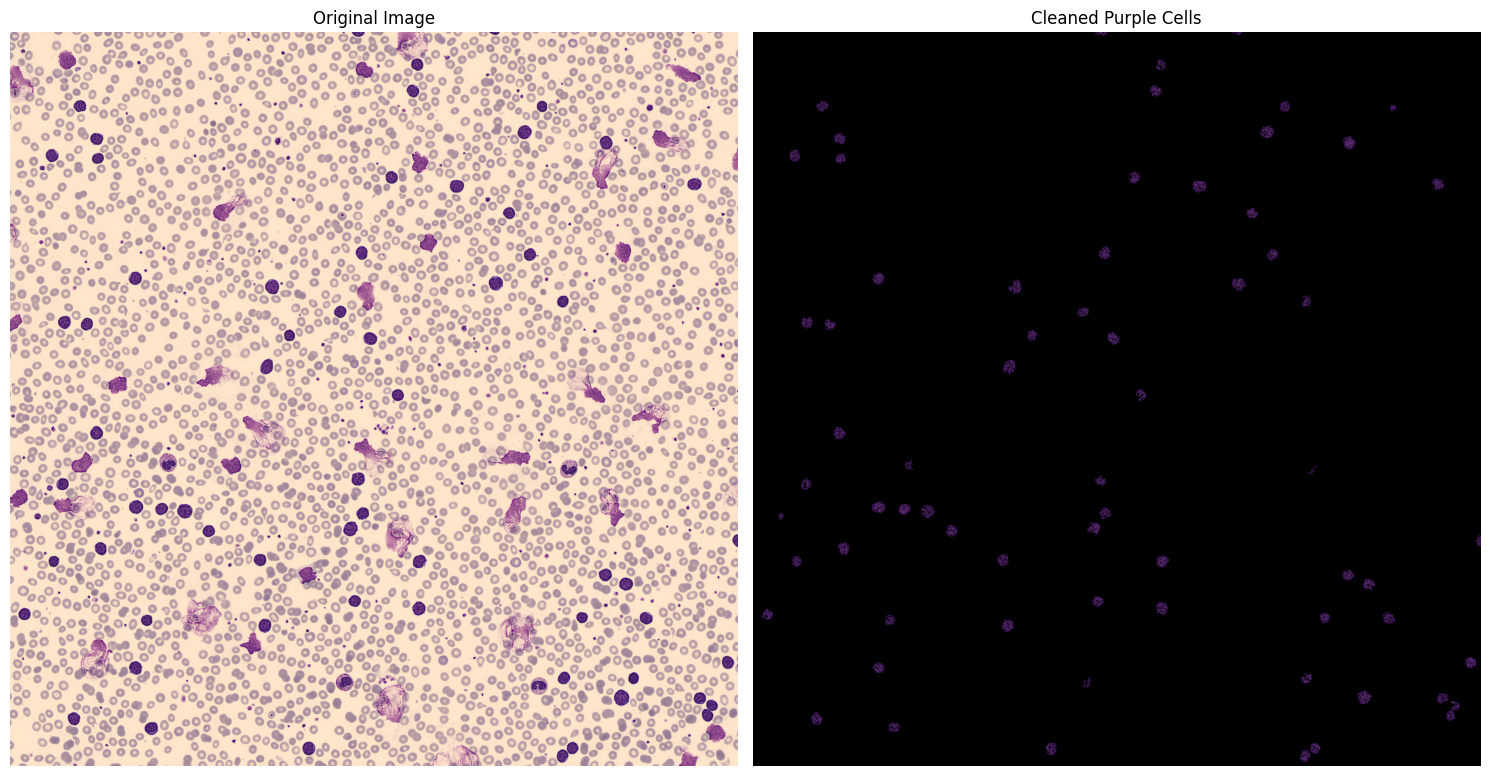

In [ ]:
from skimage import io, morphology
from skimage.color import rgb2hsv

# Load the image
image = io.imread('/content/1008323_001 (1).jpg')

# Convert the RGB image to HSV
hsv_image = rgb2hsv(image)

# Fine-tune these ranges based on the specific hues of purple and pink in your image
# Hue range for purple might be very narrow to exclude pink
purple_hue_min = 0.75  # Adjust this based on your observations
purple_hue_max = 0.80  # Adjust this based on your observations

# Saturation might be higher for purple compared to pink
purple_sat_min = 0.4  # Adjust this based on your observations
purple_sat_max = 1.0  # Adjust this based on your observations

# Value might be lower for purple compared to pink
purple_val_min = 0.2  # Adjust this based on your observations
purple_val_max = 0.8  # Adjust this based on your observations

# Create a binary mask where the pixels in the purple range are set to True
purple_mask = ((hsv_image[:, :, 0] >= purple_hue_min) & (hsv_image[:, :, 0] <= purple_hue_max) &
               (hsv_image[:, :, 1] >= purple_sat_min) & (hsv_image[:, :, 1] <= purple_sat_max) &
               (hsv_image[:, :, 2] >= purple_val_min) & (hsv_image[:, :, 2] <= purple_val_max))

# Remove small artifacts from the mask
cleaned_mask = morphology.remove_small_objects(purple_mask, min_size=200)

# Apply the cleaned mask to the original image to get the purple cells
cleaned_purple_cells = np.zeros_like(image)
cleaned_purple_cells[cleaned_mask] = image[cleaned_mask]

# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')  # Turn off axis numbers and ticks

# Display the image with cleaned purple cells only
ax[1].imshow(cleaned_purple_cells)
ax[1].set_title('Cleaned Purple Cells')
ax[1].axis('off')  # Turn off axis numbers and ticks

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# 2. Extracting the lymphocytes in the original image

In [ ]:
masked_image_path = '/content/masked_image.jpg'
io.imsave(masked_image_path, cleaned_purple_cells)

<ipython-input-16-82c694928dc3>:2: UserWarning: /content/masked_image.jpg is a low contrast image
  io.imsave(masked_image_path, cleaned_purple_cells)


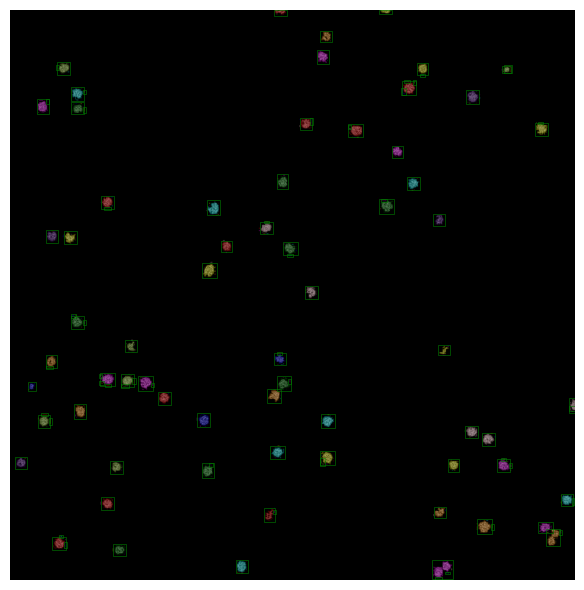

In [ ]:
from skimage import measure, io
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

# Load the masked image (this should be the result after applying your mask)
masked_image = io.imread(masked_image_path)

# Label the image regions
label_image = measure.label(masked_image[:,:,0] > 0)  # Assuming the mask is in the red channel
image_label_overlay = label2rgb(label_image, image=masked_image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

# Loop over each detected region to extract and save the cell
for region in measure.regionprops(label_image):
    if region.area < 50:
        continue

    # Expand the coordinates of the bounding box
    expansion = 5  # Adjust as needed
    minr, minc, maxr, maxc = region.bbox
    minr = max(minr - expansion, 0)
    minc = max(minc - expansion, 0)
    maxr = min(maxr + expansion, masked_image.shape[0])
    maxc = min(maxc + expansion, masked_image.shape[1])

    extracted_cell = masked_image[minr:maxr, minc:maxc]

    # Draw a thinner rectangle
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='green', linewidth=0.4)  # Adjust linewidth here
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()


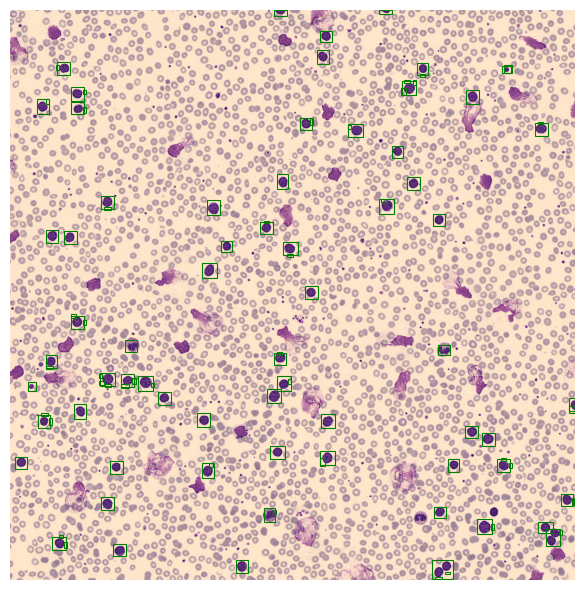

In [ ]:
from skimage import measure, io
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

# Load the original and masked images
original_image = io.imread(image_path)  # Load the original image
masked_image = io.imread(masked_image_path)  # This should be the result after applying your mask

# Label the image regions based on the masked image
label_image = measure.label(masked_image[:,:,0] > 0)  # Assuming the mask is in the red channel

# Create a figure to display the original image with the bounding boxes
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(original_image)  # Display the original image

# Loop over each detected region to draw bounding boxes on the original image
for region in measure.regionprops(label_image):
    if region.area < 50:
        continue

    # Expand the coordinates of the bounding box (as needed)
    expansion = 5  # Adjust as needed
    minr, minc, maxr, maxc = region.bbox
    minr = max(minr - expansion, 0)
    minc = max(minc - expansion, 0)
    maxr = min(maxr + expansion, original_image.shape[0])
    maxc = min(maxc + expansion, original_image.shape[1])

    # Draw a thinner rectangle on the original image
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='green', linewidth=0.8)  # Adjust linewidth here
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
from skimage import io, measure, util
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the masked image
masked_image_path = '/content/masked_image.jpg'
masked_image = io.imread(masked_image_path)

# Convert the image to grayscale if it is not already
if len(masked_image.shape) == 3:
    from skimage.color import rgb2gray
    masked_image = rgb2gray(masked_image)

# Binarize the image - assuming objects are white and background is black
binary_mask = masked_image > 0

# Label the image
label_image = measure.label(binary_mask)

# Create a directory to save the extracted object images
output_dir = 'extracted_objects'
os.makedirs(output_dir, exist_ok=True)

# Loop over each detected region to extract and save the object
for region in measure.regionprops(label_image):
    # Skip small regions that might be noise
    if region.area < 50:
        continue

    # Get the coordinates of the bounding box around each object
    minr, minc, maxr, maxc = region.bbox

    # Extract the object
    extracted_object = masked_image[minr:maxr, minc:maxc]

    # If the original image is colored, we need to extract the region from all color channels
    if len(image.shape) == 3:
        extracted_object_color =image[minr:maxr, minc:maxc, :]
    else:
        extracted_object_color = extracted_object

    # Save the extracted object
    object_filename = os.path.join(output_dir, f'object_{region.label}.png')
    io.imsave(object_filename, util.img_as_ubyte(extracted_object_color))

print(f"Extracted objects saved in directory: {output_dir}")

Extracted objects saved in directory: extracted_objects


<ipython-input-9-90519dc6ccb3>:45: UserWarning: extracted_objects/object_35.png is a low contrast image
  io.imsave(object_filename, util.img_as_ubyte(extracted_object_color))
<ipython-input-9-90519dc6ccb3>:45: UserWarning: extracted_objects/object_102.png is a low contrast image
  io.imsave(object_filename, util.img_as_ubyte(extracted_object_color))
<ipython-input-9-90519dc6ccb3>:45: UserWarning: extracted_objects/object_108.png is a low contrast image
  io.imsave(object_filename, util.img_as_ubyte(extracted_object_color))
